In [3]:
import numpy as np
import pandas as pd

In [4]:
columns_names = ['user_id','item_id','rating','timestamp']

In [5]:
df=pd.read_csv('u.data',sep='\t',names=columns_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [8]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [9]:
df=pd.merge(df,movie_titles,on='item_id')

In [10]:
df.head()


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_style('white')

In [13]:
%matplotlib inline

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Saint of Fort Washington, The (1993)                 5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [17]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [18]:
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
rating['num of ratings']= pd.DataFrame(df.groupby('title')['rating'].count())

In [24]:
rating.head()

,rating,num of ratings
title,,
'Til There Was You (1997),9,9
1-900 (1994),5,5
101 Dalmatians (1996),109,109
12 Angry Men (1957),125,125
187 (1997),41,41


<Axes: >

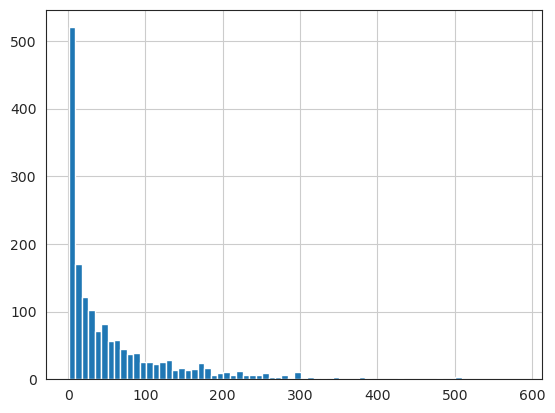

In [27]:
rating['num of ratings'].hist(bins=70)

<Axes: >

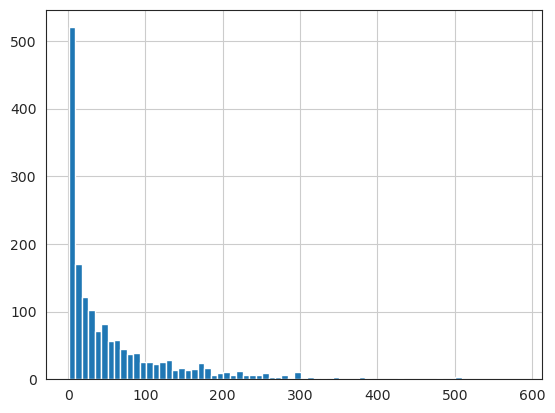

In [28]:
rating['rating'].hist(bins=70)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


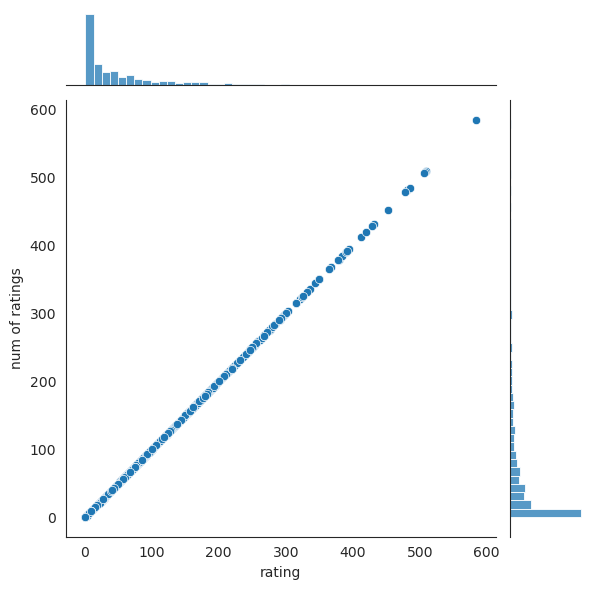

In [29]:
sns.jointplot(x='rating',y='num of ratings', data=rating)

In [30]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [32]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [33]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
rating.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),584,584
Contact (1997),509,509
Fargo (1996),508,508
Return of the Jedi (1983),507,507
Liar Liar (1997),485,485
"English Patient, The (1996)",481,481
Scream (1996),478,478
Toy Story (1995),452,452
Air Force One (1997),431,431
